In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock_name):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=("Historical Share Price", "Historical Revenue"),
                        vertical_spacing = .3)

    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.index, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)

    revenue_data['Revenue'] = revenue_data['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)


    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock_name + " Stock Price and Revenue Comparison",
                      xaxis_rangeslider_visible=True)
    fig.show()

In [2]:
tesla = yf.Ticker("TSLA")


tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

print("--- Tesla Stock Data (Head) ---")
print(tesla_data.head())


--- Tesla Stock Data (Head) ---
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:

    response = requests.get(url, headers=headers)
    response.raise_for_status() # 如果是 4xx/5xx 错误，会抛出异常

    html_data = response.text
    soup = BeautifulSoup(html_data, "html.parser")

    tables = soup.find_all('table', class_='historical_data_table')

    if len(tables) < 2:

        tables = soup.find_all('table')

    tesla_revenue = pd.read_html(str(tables[1]))[0]

    tesla_revenue.columns = ['Date', 'Revenue']

    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].astype(str).str.replace(r'[$,]', '', regex=True)

    tesla_revenue.dropna(inplace=True)

    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

    print("\n--- Tesla Revenue Data (Tail) ---")
    print(tesla_revenue.tail())

except requests.exceptions.RequestException as e:
    print(f"Web scraping failed for Tesla Revenue: {e}")
except IndexError:
    print("Web scraping failed for Tesla Revenue: Could not find the expected data table. The website structure might have changed.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


--- Tesla Revenue Data (Tail) ---
          Date Revenue
54  2011-12-31      39
55  2011-09-30      58
56  2011-06-30      58
57  2011-03-31      49
58  2010-12-31      36


/tmp/ipykernel_1192/576395300.py:36: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[1]))[0]


In [5]:
gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

print("\n--- GameStop Stock Data (Head) ---")
print(gme_data.head())



--- GameStop Stock Data (Head) ---
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:

    response = requests.get(url_gme, headers=headers)
    response.raise_for_status() # 如果是 4xx/5xx 错误，会抛出异常

    html_data = response.text
    soup = BeautifulSoup(html_data, "html.parser")

    tables = soup.find_all('table', class_='historical_data_table')
    if len(tables) < 2:
        tables = soup.find_all('table')


    gme_revenue = pd.read_html(str(tables[1]))[0]


    gme_revenue.columns = ['Date', 'Revenue']


    gme_revenue["Revenue"] = gme_revenue['Revenue'].astype(str).str.replace(r'[$,]', '', regex=True)
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]


    print("\n--- GameStop Revenue Data (Tail) ---")
    print(gme_revenue.tail())

except requests.exceptions.RequestException as e:
    print(f"Web scraping failed for GameStop Revenue: {e}")
except IndexError:
    print("Web scraping failed for GameStop Revenue: Could not find the expected data table. The website structure might have changed.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



--- GameStop Revenue Data (Tail) ---
          Date Revenue
55  2011-10-31    1947
56  2011-07-31    1744
57  2011-04-30    2281
58  2011-01-31    3693
59  2010-10-31    1899


/tmp/ipykernel_1192/1295248749.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]


In [11]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock_name):
    if 'Date' in stock_data.columns:
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        x_stock = stock_data['Date']
    else:
        x_stock = pd.to_datetime(stock_data.index)
    
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    revenue_data['Revenue'] = revenue_data['Revenue'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
    
    stock_data.dropna(subset=['Close'], inplace=True)
    revenue_data.dropna(subset=['Revenue'], inplace=True)

    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=(f"{stock_name} Historical Share Price", f"{stock_name} Historical Revenue"),
                        vertical_spacing = .3)

    fig.add_trace(go.Scatter(x=x_stock, y=stock_data['Close'].astype("float"), name="Share Price"), row=1, col=1)


    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], name="Revenue"), row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock_name + " Stock Price and Revenue Comparison",
                      xaxis_rangeslider_visible=True)
    fig.show()

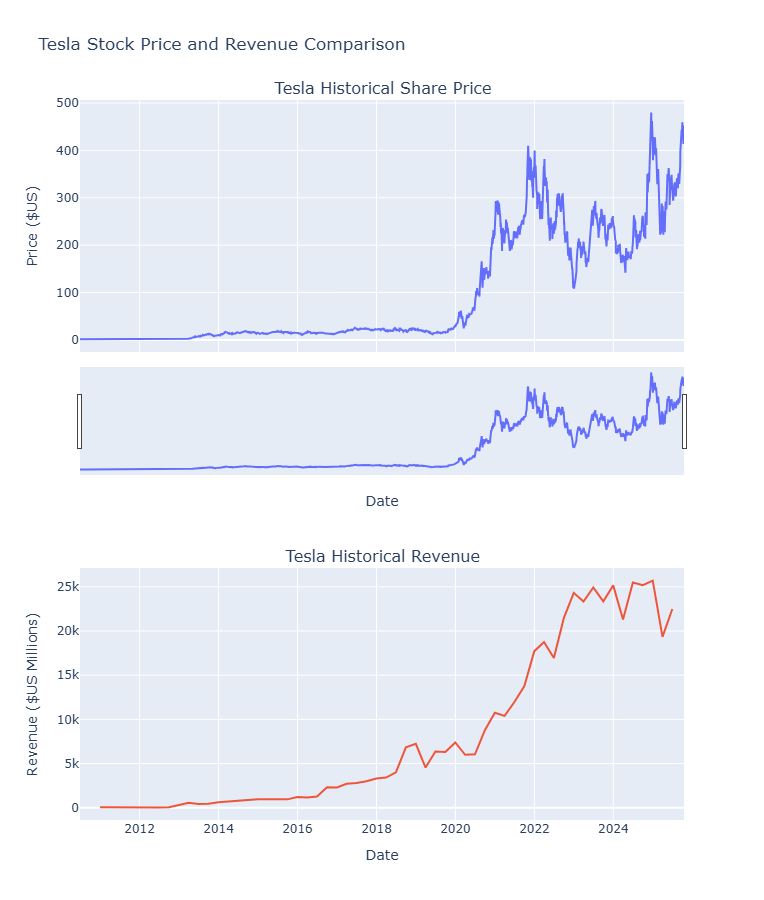

In [12]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

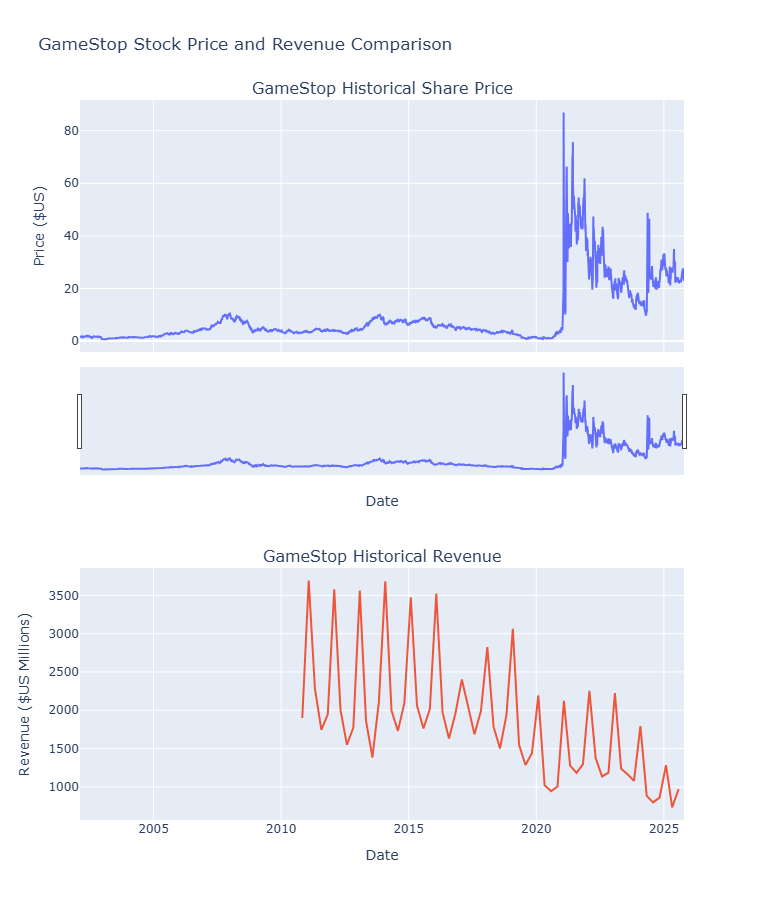

In [13]:
make_graph(gme_data, gme_revenue, 'GameStop')
